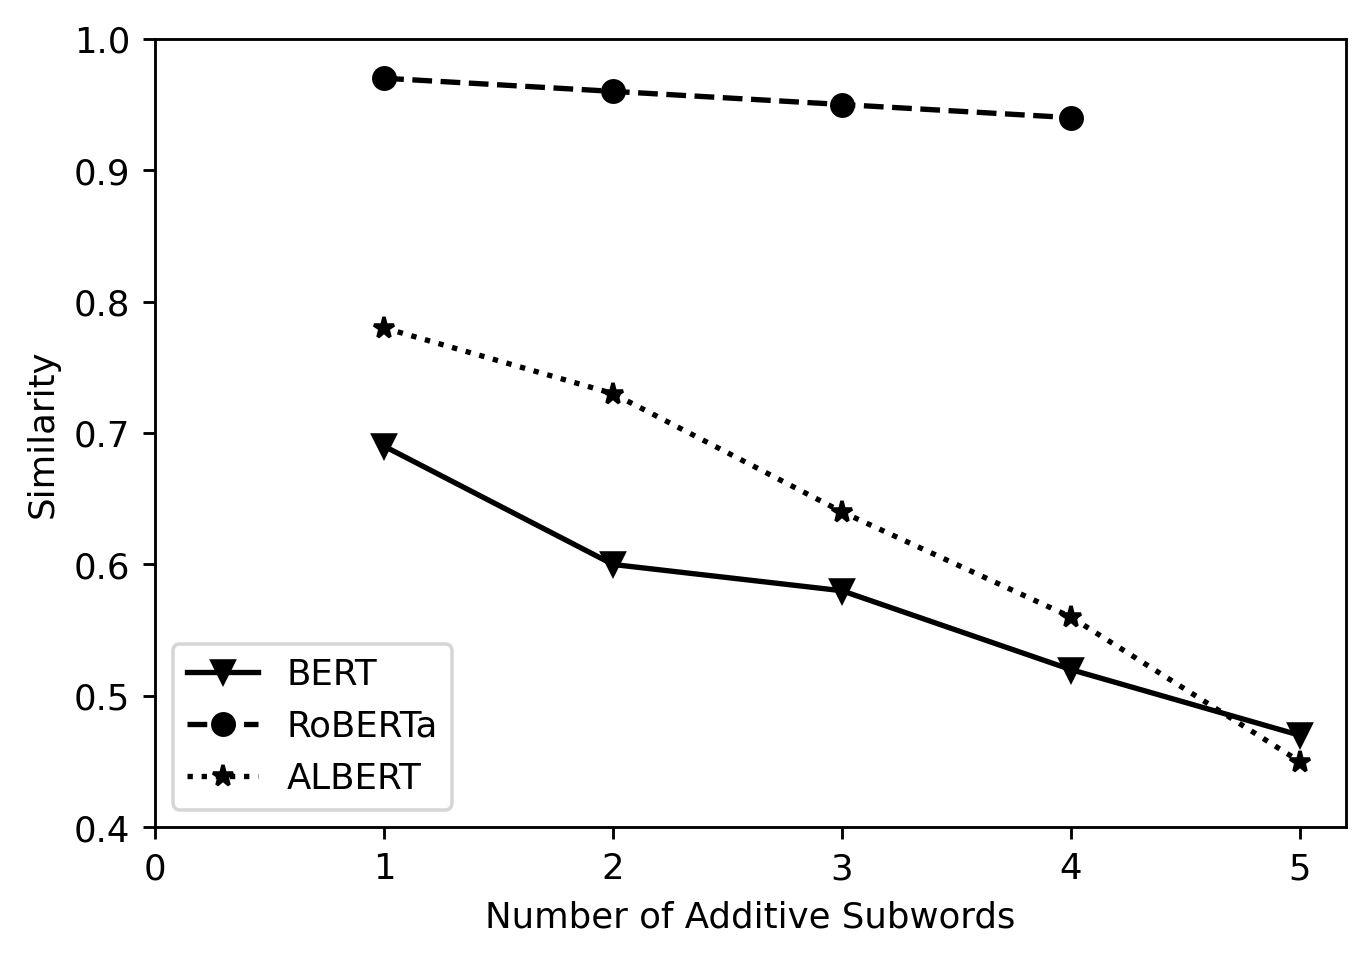

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Correlations between M-score and sim

# sentiment-lexicon-sim
result = {
    'BERT': {1: 0.69, 2: 0.60, 3: 0.58, 4: 0.52, 5: 0.47}, 
    'RoBERTa': {1:0.97,2:0.96,3:0.95,4:0.94},
    'ALBERT': {1:0.78, 2:0.73, 3:0.64, 4:0.56, 5:0.45}
    }

# sst2-sim
# result = {
#     'BERT': {2: 0.52, 3: 0.50, 4: 0.48}, 
#     'RoBERTa': {1:0.56, 2:0.54, 3:0.53},
#     'ALBERT': { 2:0.64, 3:0.57, 4: 0.51}
#     }


# ag-news-sim
# result = {
#     'BERT': {2: 0.87, 3: 0.86, 4: 0.84}, 
#     'RoBERTa': {1:0.52,2:0.56,3:0.54,4:0.58},
#     'ALBERT': { 2:0.75, 3:0.75, 4: 0.74}
#     }

fig = plt.figure( figsize=(6, 4), dpi=256 )
ax = fig.add_subplot(1,1,1)
ax.plot(result['BERT'].keys(), result['BERT'].values(), color='black', linewidth=1.5, linestyle='-', marker='v', label='BERT')
ax.plot(result['RoBERTa'].keys(), result['RoBERTa'].values(), color='black', linewidth=1.5, linestyle='--', marker='o', label='RoBERTa')
ax.plot(result['ALBERT'].keys(), result['ALBERT'].values(), color='black', linewidth=1.5, linestyle=':', marker='*', label='ALBERT')
plt.xticks(np.linspace(0, 5, 6))
plt.yticks(np.linspace(0.4, 1, 7))
ax.set_ylim(0.4,1)
ax.set_xlabel('Number of Additive Subwords')
ax.set_ylabel('Similarity')
plt.legend(loc='best', frameon=True)
plt.show()

In [1]:
from check_result import evaluate

In [9]:
import pandas as pd
import json

model_name = 'bert-base-uncased-SST-2'
noise_type = 'abbreviations'
# with open(f'outputs/result-pos-typos-{model_name}.json', 'r') as file:
#     result_list = json.load(file)
# 
# with open(f'outputs/result-neg-typos-{model_name}.json', 'r') as file:
#     result_list.extend(json.load(file))

with open(f'data/result-pos-{noise_type}-{model_name}.json', 'r') as file:
    result_list = json.load(file)

with open(f'data/result-neg-{noise_type}-{model_name}.json', 'r') as file:
    result_list.extend(json.load(file))

df_result = pd.DataFrame.from_records(result_list)



In [11]:
df_additive = df_result[df_result.type=='additive']
idx_for_additive_affix = []
idx_for_additive_intra = []
for i in range(len(df_additive)):
    orig = df_additive.iloc[i].tokens[1:-1]
    for j, t in enumerate(df_additive.iloc[i].tokens_noisy[1:-1]):
        if len(orig) > 0 and t == orig[0]:
            orig.pop(0)
        elif len(orig) == 0:
            idx_for_additive_affix.append(df_additive.index[i])
            break
        else:
            idx_for_additive_intra.append(df_additive.index[i])
            break
 # roberta: 0.984; bert: 0.958; albert: 0.941
if len(idx_for_additive_affix)>0: 
    assert df_result.iloc[idx_for_additive_affix]['type'].unique()[0] == 'additive'
    df_result.loc[idx_for_additive_affix, 'type'] = 'affix_additive'
if len(idx_for_additive_intra)>0:
    assert df_result.iloc[idx_for_additive_intra]['type'].unique()[0] == 'additive'
    df_result.loc[idx_for_additive_intra, 'type'] = 'intra_additive'

for type in ['missing']: #  'intact', 'complete', 'partial', 'affix_additive', 'intra_additive', 
    print(f'===={type}====')
    df_filter = df_result[df_result.type==type]
    print(len(df_filter))
    print(len(df_filter) / len(df_result))
    
    df_correct = df_filter[df_result['clean_pred']==True]
    accuracy = len(df_correct[df_correct['clean_pred']==df_correct['noisy_pred']])/ len(df_correct)
    print('count Additive Tokens', df_correct['countA'].mean())
    print(len(df_filter))
    print("Similarity: ", df_filter['sim'].mean())
    print("Accuracy: ", accuracy)


====intact====
1197
0.25897879705755084
count Additive Tokens 2.16235504014273
1197
Similarity:  0.8268993433655155
Accuracy:  0.5477252453166815
====complete====
2501
0.5411077455646907
count Additive Tokens 2.1851179673321233
2501
Similarity:  0.8051887062228903
Accuracy:  0.5612522686025408
====partial====
901
0.19493725659887495
count Additive Tokens 1.2503128911138923
901
Similarity:  0.8298039896440559
Accuracy:  0.7108886107634543
====missing====
23
0.0049762007788836
count Additive Tokens 0.0
23
Similarity:  0.8547082517458044
Accuracy:  0.9


/home/xinzhe/miniconda3/envs/baseline/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [48]:
df_result[df_result.type=='complete']

,clean_word,clean_pred,clean_prob,noisy_word,noisy_pred,noisy_prob,sim,tokens,tokens_noisy,type,overlap_set,missing_set,additive_set,countM,countO,countA,countM_by_countS,countA_by_char,avg_char_in_A
3,accessable,True,0.980271,accesasble,True,0.539725,0.487938,"[[CLS], access, able, [SEP]]","[[CLS], acc, esa, s, ble, [SEP]]",complete,{},"{'access': 1, 'able': 1}","{'acc': 1, 'esa': 1, 's': 1, 'ble': 1}",2.0,0.0,4.0,1.0,0.0,2.500000
18,adaptable,True,0.966361,adsptable,False,0.020532,-0.002774,"[[CLS], adapt, able, [SEP]]","[[CLS], ads, p, table, [SEP]]",complete,{},"{'adapt': 1, 'able': 1}","{'ads': 1, 'p': 1, 'table': 1}",2.0,0.0,3.0,1.0,0.0,3.000000
51,altruistic,True,0.808305,altriustic,True,0.557639,0.776542,"[[CLS], al, tru, istic, [SEP]]","[[CLS], alt, rius, tic, [SEP]]",complete,{},"{'al': 1, 'tru': 1, 'istic': 1}","{'alt': 1, 'rius': 1, 'tic': 1}",3.0,0.0,3.0,1.0,0.0,3.333333
68,angelic,True,0.917976,antelic,True,0.754152,0.751526,"[[CLS], angel, ic, [SEP]]","[[CLS], , ante, lic, [SEP]]",complete,{},"{'angel': 1, 'ic': 1}","{'': 1, 'ante': 1, 'lic': 1}",2.0,0.0,3.0,1.0,0.0,2.333333
77,ardor,False,0.020315,arodr,False,0.147693,0.610240,"[[CLS], , ard, or, [SEP]]","[[CLS], a, rod, r, [SEP]]",complete,{},"{'': 1, 'ard': 1, 'or': 1}","{'a': 1, 'rod': 1, 'r': 1}",3.0,0.0,3.0,1.0,0.0,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,spooky,False,0.125030,spooooky,False,0.178899,0.868897,"[[CLS], spook, y, [SEP]]","[[CLS], sp, oooo, ky, [SEP]]",complete,{},"{'spook': 1, 'y': 1}","{'sp': 1, 'oooo': 1, 'ky': 1}",2.0,0.0,3.0,1.0,0.0,2.666667
5849,stale,True,0.997800,stalle,True,0.998685,0.895582,"[[CLS], , s, tale, [SEP]]","[[CLS], stall, e, [SEP]]",complete,{},"{'': 1, 's': 1, 'tale': 1}","{'stall': 1, 'e': 1}",3.0,0.0,2.0,1.0,0.0,3.000000
5864,stun,False,0.016336,stunnnn,True,0.948874,0.062187,"[[CLS], , s, tun, [SEP]]","[[CLS], stu, nn, nn, [SEP]]",complete,{},"{'': 1, 's': 1, 'tun': 1}","{'stu': 1, 'nn': 2}",3.0,0.0,3.0,1.0,0.0,2.333333
5865,stun,False,0.016336,stunn,True,0.963911,0.006494,"[[CLS], , s, tun, [SEP]]","[[CLS], stu, nn, [SEP]]",complete,{},"{'': 1, 's': 1, 'tun': 1}","{'stu': 1, 'nn': 1}",3.0,0.0,2.0,1.0,0.0,2.500000


In [60]:
# df_additive[df_additive['countO'] != 1][df_additive["clean_pred"]==True][df_additive["clean_word"]!="sloooow" ]

In [142]:
# The number of additive subwords is an important factor
df_additive = df_result[df_result.type=='additive']
df_additive = df_additive[df_additive['additive_set'].apply(lambda x: len(list(x.keys()))==1)]
df_additive['additive_elements'] = df_additive['additive_set'].apply(lambda x: list(x.keys())[0])
df_additive['additive_multiplicities'] = df_additive['additive_set'].apply(lambda x: list(x.values())[0])
group_by = df_additive.groupby('clean_word')

total = 0
correlate = 0
unexpected_cases = []
for _, df in list(group_by):
    df = df[['sim', 'clean_word', 'noisy_word', 'additive_elements', 'additive_multiplicities']].reset_index()
    for _, df2 in list(df.groupby('additive_elements')):
        if len(df2) > 2:
            additive_multiplicities = list(df2['additive_multiplicities'])
            sim = list(df2['sim'])
            sorted_multiplicities = sorted(range(len(additive_multiplicities)), key=lambda k: additive_multiplicities[k])
            sorted_sim = sorted(range(len(sim)), key=lambda k: sim[k], reverse=True)
            total += 1
            if sorted_sim == sorted_multiplicities:
                correlate += 1
            else:
                print(sorted_sim, sorted_multiplicities)
                unexpected_cases.append(df2[['clean_word', 'additive_elements', 'additive_multiplicities', 'sim', ]].sort_values(by='additive_multiplicities'))
print(correlate, total)
pd.concat(unexpected_cases).to_csv('/mnt/c/Users/sergi/Downloads/error_analysis_additive.csv')

[0, 4, 1, 2, 3] [4, 3, 0, 1, 2]
[0, 1, 2] [2, 1, 0]
[0, 2, 3, 1] [2, 1, 3, 0]
[2, 3, 0, 1] [0, 2, 3, 1]
[1, 0, 2] [2, 0, 1]
[7, 1, 5, 0, 3, 6, 4, 2] [7, 3, 5, 1, 0, 6, 4, 2]
17 23


In [44]:
df_additive = df_result[df_result.type=='additive']
df_partial = df_result[df_result.type=='partial']
temp = df_partial.sort_values(by='sim')[-11:][['clean_word', 'noisy_word', 'overlap_set', 'missing_set', 'additive_set']]
temp.to_csv('/mnt/c/Users/sergi/Downloads/temp3.csv')

### Word Corruption Evaluation

All noisy words:  18120
Intact Word Corruption:  9394


/home/xinzhel/git_repo/my_subword_attack/check_result.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.countO== 1][df.wcr1 == 1]


Clean Accuracy: 0.9314456035767511  for 9394 examples.
only keep rows of which clean text is correctly predicted in df
Misclassification Rate:
<0.3 (37): 0.2432432432432432  (cos_sim: {0.5639262660532385} )
0.3-0.8 (8703): 0.36619556474778814  (cos_sim: {0.4924280664473221} )
>0.8 (10): 0.30000000000000004  (cos_sim: {0.6756473422050476} )
Metric for 1
0.125
conf: 0.8519056436683362
Metric for 2
0.3328474246841594
conf: 0.664378331713176
Metric for 3
0.39323164918970444
conf: 0.6081249622091767
Metric for 4
0.42542787286063566
conf: 0.5805928656299972
Metric for 5
0.4
conf: 0.5946139783132821
Score Distribution:  {1: 24, 2: 4116, 3: 4196, 4: 409, 5: 5}
Misclassification Rate for noise0:  0.35575826681870015
avg sim for noise0:  0.5029492203254139
Misclassification Rate for noise1:  0.3579545454545454
avg sim for noise1:  0.49235628105849505
Misclassification Rate for noise2:  0.36540664375715926
avg sim for noise2:  0.4918859198827879
Misclassification Rate for noise3:  0.3617511520737

/home/xinzhel/git_repo/my_subword_attack/check_result.py:106: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select = df[df["countM_by_word_len"]>=min_val][df["countM_by_word_len"]<=max_val]


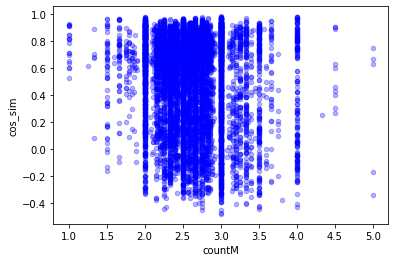

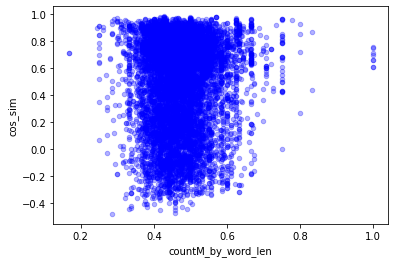

In [3]:
output_dir = "outputs_local_mixed_noise"
dataset_name = "sst2"
model_name = 'bert-base-uncased-SST-2'
seq_max_len=None

# Evaluating PLMs
df = evaluate(
    output_dir = output_dir,
    dataset_name = dataset_name, 
    model_name=model_name, 
    acc=True, 
    mode="intact", 
    seq_max_len=seq_max_len, 
    countM_by_word_len_min_val = 0.3,
    countM_by_word_len_max_val=0.8,
    no_consistent_pred=False,
    print_acc_sim_by_noise=True
    )


All noisy words:  18120
Intact Word Corruption:  1669
Clean Accuracy: 0.8502097064110246  for 1669 examples.
only keep rows of which clean text is correctly predicted in df
Misclassification Rate:
<0.3 (13): 0.15384615384615385  (cos_sim: {0.5370122056740981} )
0.3-0.8 (1400): 0.26642857142857146  (cos_sim: {0.5570951881292941} )
>0.8 (6): 0.16666666666666663  (cos_sim: {0.513672816256682} )
Metric for 1
0.3157894736842105
conf: 0.6156814841455535
Metric for 2
0.26325088339222613
conf: 0.7056320814116341
Metric for 3
0.2575107296137339
conf: 0.7099644605534016
Metric for 4
0.34285714285714286
conf: 0.5962717945022242
Score Distribution:  {1: 19, 2: 1132, 3: 233, 4: 35}
Misclassification Rate for noise0:  0.27464788732394363
avg sim for noise0:  0.5348758609624396
Misclassification Rate for noise1:  0.2605633802816901
avg sim for noise1:  0.5549620258372644
Misclassification Rate for noise2:  0.2676056338028169
avg sim for noise2:  0.5572799701558452
Misclassification Rate for noise3:  

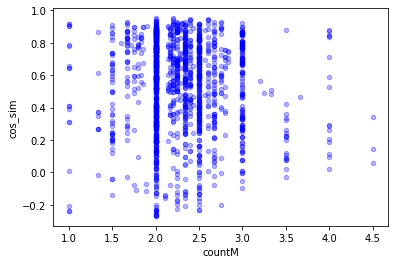

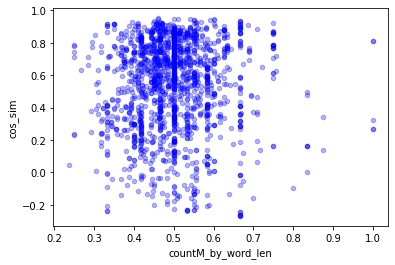

In [6]:
output_dir = "outputs_local_mixed_noise"
dataset_name = "sst2"
model_name = 'roberta-base-SST-2'
seq_max_len=None

# Evaluating PLMs
df = evaluate(
    output_dir = output_dir,
    dataset_name = dataset_name, 
    model_name=model_name, 
    acc=True, 
    mode="intact", 
    seq_max_len=seq_max_len, 
    countM_by_word_len_min_val = 0.3,
    countM_by_word_len_max_val=0.8,
    no_consistent_pred=False,
    print_acc_sim_by_noise=True)


All noisy words:  18120
Intact Word Corruption:  9394


/home/xinzhel/git_repo/my_subword_attack/check_result.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.countO== 1][df.wcr1 == 1]


Clean Accuracy: 0.9314456035767511  for 9394 examples.
only keep rows of which clean text is correctly predicted in df
Misclassification Rate:
<0.3 (37): 0.2432432432432432  (cos_sim: {0.5639262660532385} )
0.3-0.8 (8703): 0.36619556474778814  (cos_sim: {0.4924280664473221} )
>0.8 (10): 0.30000000000000004  (cos_sim: {0.6756473422050476} )
Metric for 1
0.125
conf: 0.8519056436683362
Metric for 2
0.33349491032476974
conf: 0.6637971048100632
Metric for 3
0.39302769818529126
conf: 0.6082827859942909
Metric for 4
0.42260442260442266
conf: 0.5833436722687848
Metric for 5
0.4
conf: 0.5946139783132821
Score Distribution:  {1: 24, 2: 4126, 3: 4188, 4: 407, 5: 5}
Misclassification Rate for noise0:  0.35575826681870015
avg sim for noise0:  0.5029492203254139
Misclassification Rate for noise1:  0.3579545454545454
avg sim for noise1:  0.49235628105849505
Misclassification Rate for noise2:  0.36540664375715926
avg sim for noise2:  0.4918859198827879
Misclassification Rate for noise3:  0.36175115207

/home/xinzhel/git_repo/my_subword_attack/check_result.py:107: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select = df[df["countM_by_word_len"]>=min_val][df["countM_by_word_len"]<=max_val]


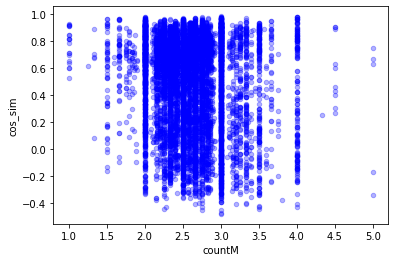

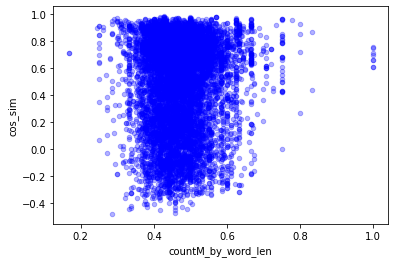

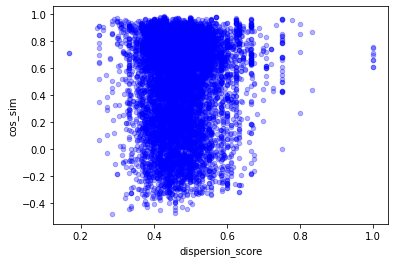

In [3]:
output_dir = "outputs_local_mixed_noise"
dataset_name = "sst2"
model_name = 'bert-base-uncased-SST-2'
seq_max_len=None

# Evaluating PLMs
df = evaluate(
    output_dir = output_dir,
    dataset_name = dataset_name, 
    model_name=model_name, 
    acc=True, 
    mode="intact", 
    seq_max_len=seq_max_len, 
    countM_by_word_len_min_val = 0.3,
    countM_by_word_len_max_val=0.8,
    no_consistent_pred=False,
    print_acc_sim_by_noise=True)


### Interpreting Predictions of Noisy Sentences with High Diversion Scores (i.e., Character-prone Context Words) --- Case Study

In [19]:
# Find examples with high diversion scores and high sent sim and correctly predicted
from check_result import read_df
from resource import check_valid_name
import resource
import torch
import torch.nn.functional as F
from utils import IntegratedGradient

def interpret(model_bundle, words, labels, noise_indices, distracted_indices=[], masked_indices=[],  no_sep=False):

    # prepare model input
    model_input = model_bundle.get_model_input_from_words(words, masked_indices=masked_indices)
    if no_sep:
        model_input = {k: v[:, :-1] for k, v in model_input.items()}

    # compute attribution scores for all tokens
    ig_salient = IntegratedGradient(model_bundle.model, ) #  embedding_layer=model_bundle.model.bert
    with torch.autograd.set_detect_anomaly(True):
        ig_grads = ig_salient.integrate_gradients({**model_input, 'labels':torch.LongTensor(labels)})
    
    # print('Distribution: ', F.softmax(model_bundle.get_logit_from_words(words)))
    wordpieces, offsets = model_bundle.tokenize_from_words(words)
    wordpieces = wordpieces['token_str']
    wp_scores_pairs = [(wp, round(grad,2)) for wp, grad in zip(wordpieces, ig_grads)]

    # for noise word(s)
    total_score_for_target_words = 0
    for i in noise_indices:
        for j in range(offsets[i][0], offsets[i][1]+1, 1):
            total_score_for_target_words += ig_grads[j] 
    
    # for distracted word
    score_for_distracted_word = 0
    for i in distracted_indices:
        for j in range(offsets[i][0], offsets[i][1]+1, 1):
            score_for_distracted_word += ig_grads[j] 
    
    return total_score_for_target_words, score_for_distracted_word, wp_scores_pairs

def get_masked_indices(words, noisy_words ):
    noise_indices = [i  for i, w in enumerate(words) if words[i]!=noisy_words[i]]
    masked_indices = []
    for i in noise_indices:
        if i-1 >=0:
            masked_indices.append(i-1)
        if i+1 < len(words):
            masked_indices.append(i+1)
    for i, w in enumerate(words):
        if words[i]!=noisy_words[i]:
            print(words[i], noisy_words[i])
    return masked_indices


In [25]:
def interpret_one_example(example_pd_series, add_distraction_words=False, mask_surrounding_words=False):
    print(' '.join(example_pd_series['text']))
    
    label = example_pd_series['label']
    words = example_pd_series['text']
    noisy_words = example_pd_series['noisy_txt']
    if add_distraction_words:
        words.insert(0, 'good') if label == 1 else words.insert(0, 'bad')
        print(words)
        noisy_words.insert(0, 'good') if label == 1 else noisy_words.insert(0, 'bad')
        print(noisy_words)
    noise_indices = [i  for i, w in enumerate(words) if words[i]!=noisy_words[i]]
    masked_indices=[]
    if mask_surrounding_words:
        masked_indices = get_masked_indices(words, noisy_words)

    model_bundle = resource.hf_model_bundles[model_name]
    
    # print('====Original w/o [SEP]: \n')
    scores_for_words, score_for_distracted_word, wp_scores_pairs = interpret(model_bundle, words, [label], noise_indices, distracted_indices=[0], no_sep=True)
    # print('====\n\n\n')

    # print('====Noisy w/o [SEP]: \n')
    scores_for_noisy_words, score_for_distracted_word2, wp_scores_pairs2 = interpret(model_bundle, noisy_words, [label], noise_indices, distracted_indices=[0], no_sep=True, )
    # print(scores_for_words-scores_for_noisy_words, '=', scores_for_noisy_words, '-', scores_for_words)
    print(score_for_distracted_word, wp_scores_pairs, score_for_distracted_word2,)
    # print('====\n\n\n')

#     print('====Original w/o [SEP] after masking: \n')
#     scores_for_words, score_for_distracted_word = interpret(model_bundle, words, [label], noise_indices, distracted_indices=0, no_sep=True, masked_indices=masked_indices)
#     print('====\n\n\n')
# 
#     print('====Noisy w/o [SEP] after masking: \n')
#     scores_for_noisy_words, score_for_distracted_word2 = interpret(model_bundle, noisy_words, [label], noise_indices, distracted_indices=0, no_sep=True, masked_indices=masked_indices)
#     print(scores_for_words-scores_for_noisy_words, '=', scores_for_noisy_words, '-', scores_for_words)
#     print('====\n\n\n')
    # Due to the non-linear interaction of deep networks, information from other tokens may propagate to the [SEP] token.


In [17]:
# 
output_dir = "outputs_local_mixed_noise"
dataset_name = "sst2"
model_name = 'bert-base-uncased-SST-2'
df, noisy_data = read_df(output_dir, dataset_name, model_name)
select = df[df['cos_sim'] > 0.8][df['dispersion_score']>0.8]
        
example_pd_series = select.iloc[0]
interpret_one_example(example_pd_series)

print(' '.join(select.iloc[0]['text']))
words = select.iloc[0]['text']
noisy_words = select.iloc[0]['noisy_txt']
labels = [select.iloc[0]['label']]
noise_indices = [i  for i, w in enumerate(words) if words[i]!=noisy_words[i]]
masked_indices = get_masked_indices(words, noisy_words)


All noisy words:  18120


/home/xinzhel/.pyenv/versions/3.7.9/envs/allennlp-dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Bartleby is a one - joke movie , and a bad joke at that .
one oge
bad bqd
====Original w/o [SEP]: 



/home/xinzhel/.pyenv/versions/3.7.9/envs/allennlp-dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Distribution:  tensor([0.9986, 0.0014])
[('[CLS]', 0.01), ('bart', 0.04), ('##le', 0.01), ('##by', 0.03), ('is', 0.01), ('a', 0.04), ('one', 0.08), ('-', 0.06), ('joke', 0.03), ('movie', 0.07), (',', 0.13), ('and', 0.17), ('a', 0.01), ('bad', 0.19), ('joke', 0.09), ('at', 0.0), ('that', 0.01), ('.', 0.01)]
0.2733783652055065
====



====Noisy w/o [SEP]: 

Distribution:  tensor([0.9950, 0.0050])
[('[CLS]', 0.03), ('bart', 0.0), ('##le', 0.0), ('##by', 0.06), ('is', 0.01), ('a', 0.15), ('og', 0.02), ('##e', 0.03), ('-', 0.05), ('joke', 0.07), ('movie', 0.05), (',', 0.02), ('and', 0.04), ('a', 0.03), ('b', 0.06), ('##q', 0.04), ('##d', 0.09), ('joke', 0.03), ('at', 0.06), ('that', 0.06), ('.', 0.08)]
0.226230930449549
====



====Original w/o [SEP] after masking: 

Distribution:  tensor([0.9986, 0.0014])
[('[CLS]', 0.0), ('bart', 0.02), ('##le', 0.04), ('##by', 0.06), ('is', 0.02), ('a', 0.04), ('one', 0.1), ('-', 0.01), ('joke', 0.01), ('movie', 0.04), (',', 0.05), ('and', 0.1), ('a', 0.